<a href="https://colab.research.google.com/github/Koketso-dax/prosper-data/blob/main/Part_II_slide_deck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insights from Loan_Data by Prosper
## by Koketso Diale

## Investigation Overview

*Key insights*

> Prospect's Rating score favors property owners, people with a stable source of income and higher credit balances, in the exploration it was thought that this was due to longer employment durations instead of employment status.

> Canada relatively has better economic conditions in this dataset as made evident by the high number of people who are employed and thus a relatively high number of loan entries.

> In the Prospect Rankings, the AA tier is the minority however they are mostly situated in Canada.

## Dataset Overview

This study Explored the Loan Data by Prosper dataset which contain various finance related data and features that relate to the loan application process at Prosper.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
!wget 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
df = pd.read_csv('prosperLoanData.csv')

--2024-03-04 14:11:08--  https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.108.224, 52.217.143.32, 54.231.224.112, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.108.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86471101 (82M) [application/octet-stream]
Saving to: ‘prosperLoanData.csv’

prosperLoanData.csv 100%[===================>]  82.46M  63.7MB/s    in 1.3s    

2024-03-04 14:11:09 (63.7 MB/s) - ‘prosperLoanData.csv’ saved [86471101/86471101]



## Distribution of ProsperRating(Alpha) vs AvailableBankcardCredit with EmploymentStatus as legend.

> This graph shows the distribution of Borrowers against their ratings. Through this we can see that the AA tier mostly consists of Employed persons with a high AvailableBankcardCredit.

> Notice the positional encoding indicate rankings.

> There is a positive correlation from left to right and downwards to upwards.

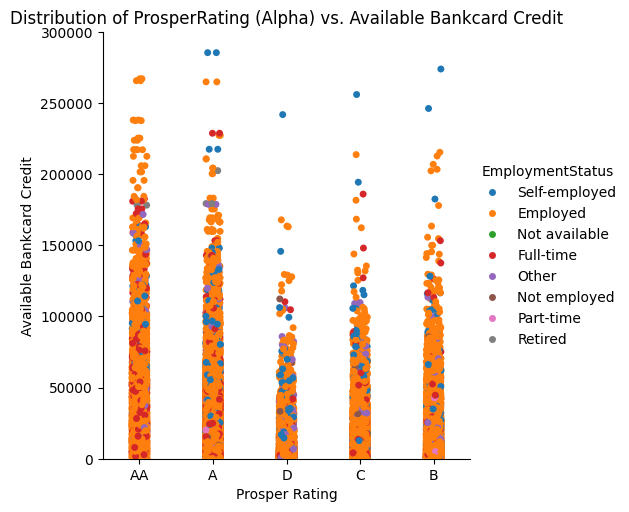

In [7]:
# Plot ProsperRating (Alpha) vs AvailableBankcardCredit vs EmploymentStatus
ratings_order = ['AA', 'A', 'D', 'C', 'B', 'A', 'AA']
sb.catplot(data=df, x='ProsperRating (Alpha)', y='AvailableBankcardCredit', hue='EmploymentStatus',
           order=ratings_order);
plt.ylim(0, 300000);
plt.title('Distribution of ProsperRating (Alpha) vs. Available Bankcard Credit');
plt.ylabel('Available Bankcard Credit');
plt.xlabel('Prosper Rating');

plt.show();

## Distribution of `States by Prosper Rating`

Heatmap of `BorrowerState vs ProsperRating (Alpha).`

> This visual plots the Borrower's frequency by State and indicates the count of each ProsperRating (Alpha) for the States.

> Notice the positional encoding clear shows Canada has lighter shades in most of the higher categories.

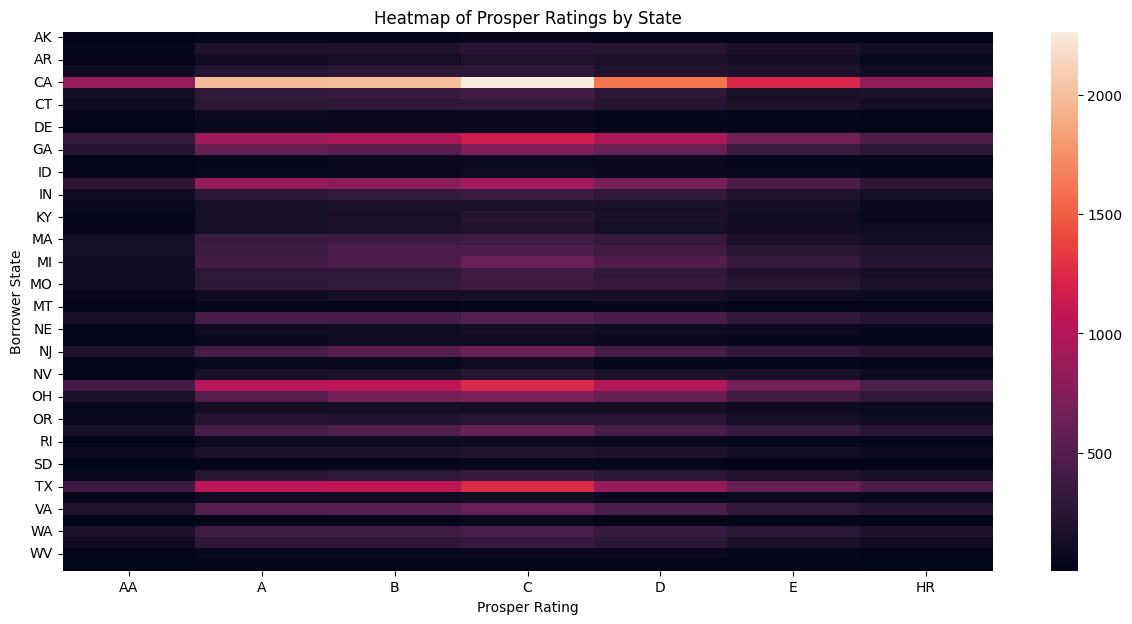

In [8]:
ratings_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ratings_by_state = df.groupby(['BorrowerState','ProsperRating (Alpha)']).size();

ratings_by_state = ratings_by_state.reset_index(name='count');

ratings_by_state = ratings_by_state.pivot(index = 'BorrowerState', columns = 'ProsperRating (Alpha)', values = 'count');

ratings_by_state = ratings_by_state.reindex(columns=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);
plt.figure(figsize=(15, 7));
sb.heatmap(ratings_by_state);
plt.title('Heatmap of Prosper Ratings by State')
plt.xlabel('Prosper Rating');
plt.ylabel('Borrower State');
plt.show(block=False);

## Relational plot of IsHomeOwner vs Employment Duration.

> This Box plot indicating the relationship between EmploymentDuration & ProsperRating between Borrowers who are home owners and those who are None Home owners with Prosper Rating as a legend.

> The higher placement of the box plots of the home owners indicate how much longer most of them have been currently employed.

> The greater volume of the boxes indicate their higher Prosper Ratings

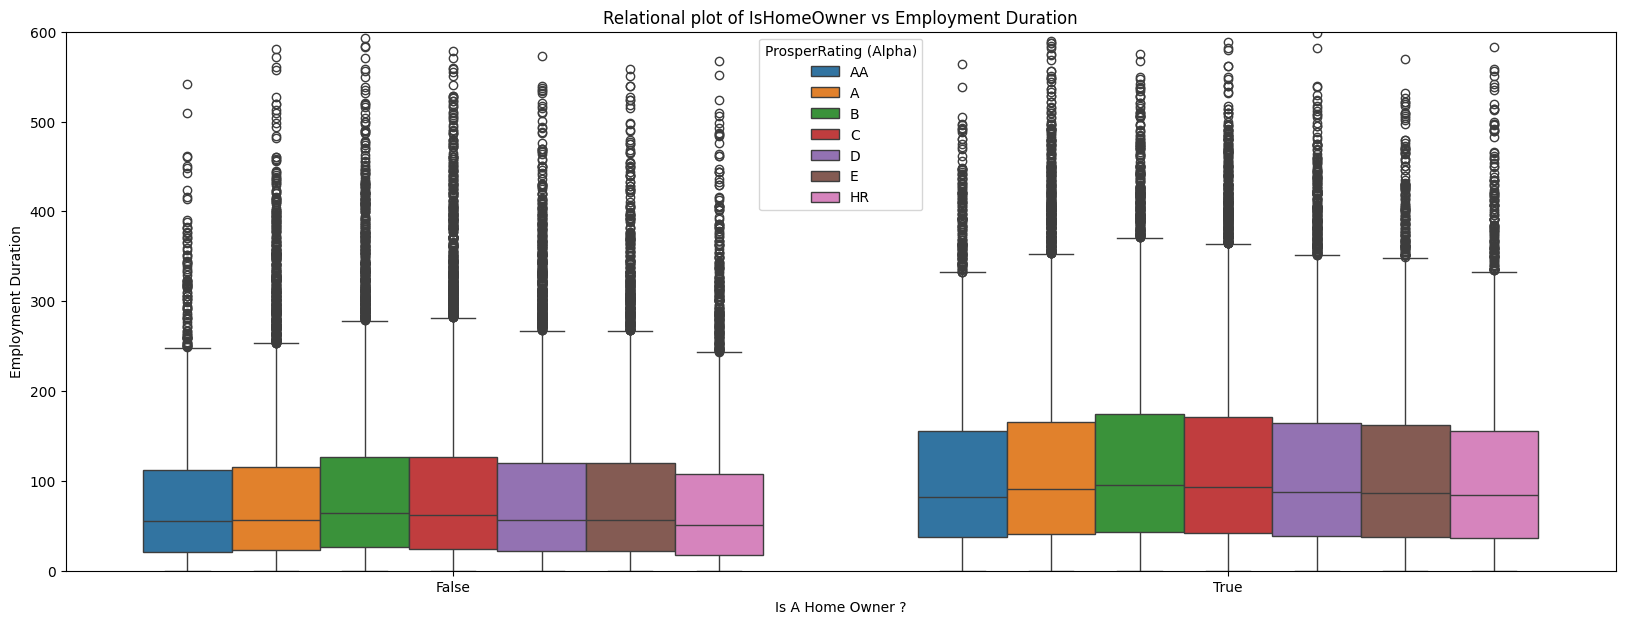

In [9]:
plt.figure(figsize=(20, 7));
sb.boxplot(data=df, x='IsBorrowerHomeowner', y='EmploymentStatusDuration'
            , hue='ProsperRating (Alpha)', hue_order=ratings_order);
plt.title('Relational plot of IsHomeOwner vs Employment Duration')
plt.xlabel('Is A Home Owner ?');
plt.ylabel('Employment Duration');
plt.ylim(0, 600);
plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 423759 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 